# Create a map with Cartopy

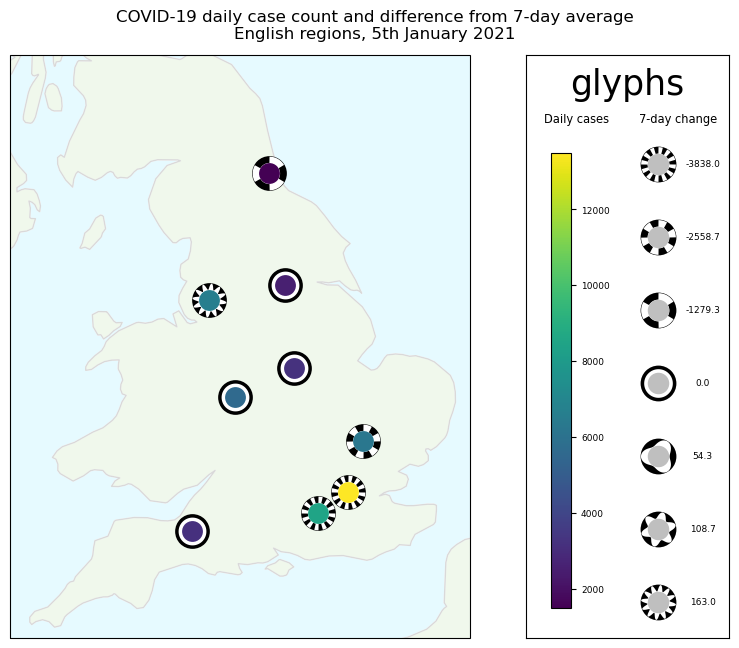

In [28]:
from vizent import vizent_plot
import pandas as pd
import cartopy.crs as ccrs

data = pd.read_csv("sample-data/england-covid-example.csv")

x = data['lon'].tolist()
y = data['lat'].tolist()
cases = data['Cases'].tolist()
accel = data['Diff7Day'].tolist()

# Project lon lats to web mercator using Cartopy
crs = ccrs.epsg(3857)
projected_points = [crs.transform_point(i,j,src_crs=4326) for i,j in zip(x,y)]

size = [25]*len(x)
extent = [-6, 2, 49.9, 56]

fig = vizent_plot(x_values=[i[0] for i in projected_points], 
                  y_values=[i[1] for i in projected_points], 
                  colour_values=cases, 
                  shape_values=accel, 
                  size_values=size, 
                  shape_label="7-day difference", 
                  color_label="Daily cases", 
                  use_cartopy=True, 
                  cartopy_projection=crs,
                  extent=extent
                  ) 

title = fig.suptitle('COVID-19 daily case count and difference from 7-day average\nEnglish regions, 5th January 2021', y=0.94)